<a href="https://colab.research.google.com/github/inefable12/C8987_QuimComp_y_Sim/blob/main/UPCH_C8987_semana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{Cálculo de π y perfiles de energía}$$

$$\large\textbf{Sesión N°2}$$
$$\textit{(C8987) Química Computacional y Simulaciones}$$

# Método Montecarlo

- Existen problemas en los que hay una gran variedad de escenarios posibles.
- El método MonteCarlo nos permite explotar una muestra grande de los posibles resultados de un experimento.
- Al realizar esta exploración se puede extraer información importante del fenómeno a estudiar.
Veamos algunos ejemplos:
- Cálculo de π
- Difusión de neutrones. Este problema surgió en Los Alamos en las investigaciones de la bomba atómica y la solución dio origen al método Montecarlo.
- Simulaciones en finanzas: De este modo, se simulan las propiedades estocásticas propias del mercado.

Los números aleatorios son fundamentales en el método de Montecarlo, por lo cual, resulta necesario generarlos en las simulaciones que realizaremos.


**Generación de números aleatorios**

In [4]:
# Creamos un arreglo de números usando numpy
import numpy as np

a = np.array([10,40,5])
a

array([10, 40,  5])

In [13]:
# Podemos hacer operaciones
3*a - 2*a - 1

array([ 9, 39,  4])

In [14]:
# potenciación
a**2

array([ 100, 1600,   25])

In [15]:
# Llamar a cada elemento
a[1]

40

In [18]:
# Generar números en un determinado rango
b = np.linspace(10,20)
b

array([10.        , 10.20408163, 10.40816327, 10.6122449 , 10.81632653,
       11.02040816, 11.2244898 , 11.42857143, 11.63265306, 11.83673469,
       12.04081633, 12.24489796, 12.44897959, 12.65306122, 12.85714286,
       13.06122449, 13.26530612, 13.46938776, 13.67346939, 13.87755102,
       14.08163265, 14.28571429, 14.48979592, 14.69387755, 14.89795918,
       15.10204082, 15.30612245, 15.51020408, 15.71428571, 15.91836735,
       16.12244898, 16.32653061, 16.53061224, 16.73469388, 16.93877551,
       17.14285714, 17.34693878, 17.55102041, 17.75510204, 17.95918367,
       18.16326531, 18.36734694, 18.57142857, 18.7755102 , 18.97959184,
       19.18367347, 19.3877551 , 19.59183673, 19.79591837, 20.        ])

In [19]:
len(b)

50

In [27]:
# Si indicamos cuantos números queremos generar
b = np.linspace(20,200,10)
b

array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.])

Usando linspace le indicamos el número inicial, el final y el número de elementos contenidos, sin embargo, existe otra forma de generar los números indicando el intervalo que deseamos que tengan los números, para ello usamos arange.

In [28]:
c = np.arange(20,200,10)
c

array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190])

In [29]:
len(c)

18

In [31]:
type(c[0])

numpy.int64

In [32]:
type(b[0])

numpy.float64

In [34]:
# Para la creación de números aleatorios entre 0 y 1 podemos usar random
np.random.rand(3,2)

array([[0.55302294, 0.87909499],
       [0.08667529, 0.64017763],
       [0.05187638, 0.47170033]])

In [38]:
# Podemos utilizar "choice" para seleccionar aleatoriamente un elemento
nombres = np.array(['maria','juan','pedro','ana'])
print('Selección: ', np.random.choice(nombres))

Selección:  pedro


In [ ]:
# Ejercicio: Elabora el código para repartir una carta aleatoria en una baraja
# Ejemplo: 5 trebol, 3 corazon

# A. Aplicaciones del método

## 1. Lanzamiento de moneda

In [39]:
# Creamos una función para obtener cara o sello

def lanzar_moneda():
  moneda = np.array(['cara','sello'])
  resultado = np.random.choice(moneda)
  return(resultado)

In [46]:
lanzar_moneda()

'sello'

In [50]:
# Conteo de resultados
caraConteo = 0
selloConteo = 0
for i in range(1000):
  resultado = lanzar_moneda()
  if resultado == 'cara':
    caraConteo += 1
  else:
    selloConteo += 1
print('Conteo cara: ', caraConteo)
print('Conteo sello: ', selloConteo)

Conteo cara:  471
Conteo sello:  529


## 2. Apuesta en ruleta

In [51]:
# En una ruleta tenemos 37 casilleros, realicemos apuestas y veamos qué casos de éxito tenemos

num = np.arange(0,37)
num

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [52]:
apuesta = input('Escoje un número entre el 0 y 36: ')
res = np.random.choice(num)
print('Apostaste por',apuesta,'Resultado es',res)
if apuesta == res:
  print('GANADOR :-)')
else:
  print('PERDISTE :-(')

Escoje un número entre el 0 y 36: 20
Apostaste por 20 Resultado es 18
PERDISTE :-(


In [56]:
# Si disponemos de un capital inicial de 100
dinero_total = 100
apuesta = 17

print('Apostaste por', apuesta,'resultado: ',res)
if apuesta == res:
  #ganaste
  dinero_total += 1
else:
  dinero_total -= 1
print('Dinero:', dinero_total)

Apostaste por 17 resultado:  18
Dinero: 99


In [60]:
# Si realizamos varias apuestas
dinero_total = 100
apuesta = 17

for i in range(5):
  print('Jugada número',i+1)
  res = np.random.choice(num)
  print('Apostaste por', apuesta,'resultado: ',res)
  if apuesta == res:
    #ganaste
    dinero_total += 1
  else:
    dinero_total -= 1
print('Dinero:', dinero_total)

Jugada número 1
Apostaste por 17 resultado:  26
Jugada número 2
Apostaste por 17 resultado:  7
Jugada número 3
Apostaste por 17 resultado:  10
Jugada número 4
Apostaste por 17 resultado:  23
Jugada número 5
Apostaste por 17 resultado:  1
Dinero: 95


In [61]:
def jugar(apuesta,N):
  # N apuestas por el número "apuesta" en la ruleta
  num = np.arange(0,37)
  ganar = 0
  perder = 0
  for i in range(N):
    res = np.random.choice(num)
    if apuesta == res:
      ganar += 1
    else:
      perder += 1
  return [ganar,perder]

In [63]:
jugar(17,100)

[1, 99]

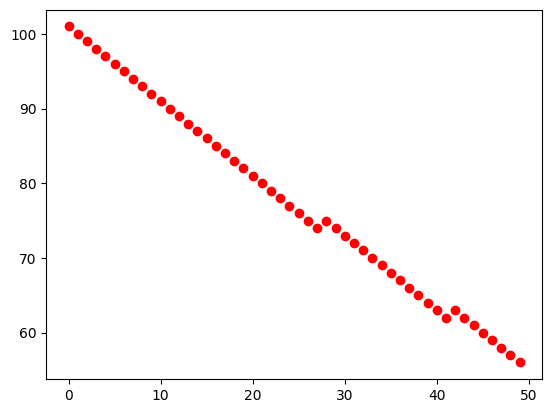

In [76]:
N = 50 #numero de veces que se juega
apuesta = 17 #mi número elegido
dinero_inicial = 100
num = np.arange(0,37)
ganar = 0
perder = 0

for i in range(N):
    res = np.random.choice(num)
    if apuesta == res:
      ganar += 1
      dinero_inicial += 1
      plt.plot(i,dinero_inicial,'ro')
    else:
      perder += 1
      dinero_inicial -= 1
      plt.plot(i,dinero_inicial,'ro')


## Calculo de π

Crear el código para calcular π empleando una función llamada "monte_carlo_pi" aplicada a un número de muestras "num_samples".

In [ ]:
# Elabora tu código


In [ ]:
num_samples = 10000000  # Número de muestras a utilizar
pi_estimate = monte_carlo_pi(num_samples)
print("Estimación de pi usando método de Monte Carlo:", pi_estimate)

Estimación de pi usando método de Monte Carlo: 3.1410788


# 2. Perfil de energía

In [64]:
%%capture
!pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

In [65]:
import matplotlib.pyplot as plt
from energydiagram import ED

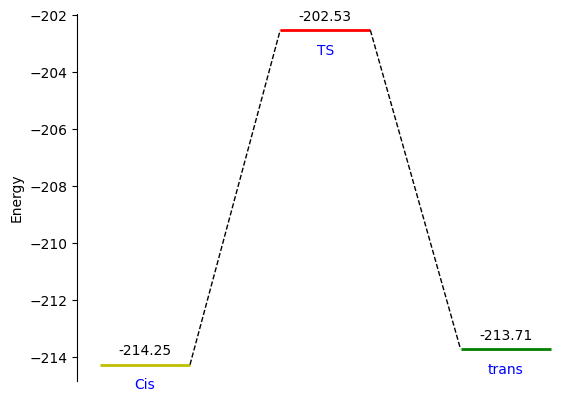

In [69]:
resultado_cis = -214.25
resultado_cis_90 = -202.53
resultado_trans = -213.71

diagram = ED()
diagram.add_level(resultado_cis,'Cis',color='y')
diagram.add_level(resultado_cis_90,'TS',color='r')
diagram.add_level(resultado_trans,'trans',color='g')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy")

In [70]:
E_activacion = resultado_cis_90 - resultado_cis
E_activacion

11.719999999999999

In [71]:
entalpia = resultado_trans - resultado_cis
if entalpia>0:
  print("La reacción es endotérmica")
else:
    print("La reacción es exotérmica")

La reacción es endotérmica
